In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.arff
/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx
/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset_Citation_Request.txt


In [2]:
!pip install flaml
!pip install openpyxl
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPool2D, Conv2D
from sklearn.model_selection import train_test_split
from flaml import AutoML
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 322.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.0
    Uninstalling xgboost-1.6.0:
      Successfully uninstalled xgboost-1.6.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 520.6 kB/s eta 0:00:00


In [3]:
PumpkinData = pd.read_excel('/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
PumpkinData

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [4]:
dictForClasses = {k: v for k, v in zip(list(set(PumpkinData.iloc[:, -1].tolist())),
                    list(range(len(list(set(PumpkinData.iloc[:, -1].tolist()))))))}

In [5]:
dictForClasses

{'Çerçevelik': 0, 'Ürgüp Sivrisi': 1}

In [6]:
for i in range(2500):
    if PumpkinData.iloc[i, -1] == 'Çerçevelik':
        PumpkinData.iloc[i, -1] = 0
    else:
        PumpkinData.iloc[i, -1] = 1

In [7]:
PumpkinData

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [8]:
X = np.array(PumpkinData.iloc[:, 0:12])
y = np.asarray(PumpkinData.iloc[:, -1]).astype('int64')

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)

model = AutoML()
model.fit(X_train, y_train, metric='accuracy', task='classification', time_budget=10)

[flaml.automl: 05-09 07:47:16] {2105} INFO - task = classification
[flaml.automl: 05-09 07:47:16] {2107} INFO - Data split method: stratified
[flaml.automl: 05-09 07:47:16] {2111} INFO - Evaluation method: cv
[flaml.automl: 05-09 07:47:16] {2188} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 05-09 07:47:17] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-09 07:47:17] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-09 07:47:17] {2698} INFO - Estimated sufficient time budget=3656s. Estimated necessary time budget=90s.
[flaml.automl: 05-09 07:47:17] {2750} INFO -  at 0.5s,	estimator lgbm's best error=0.1275,	best estimator lgbm's best error=0.1275
[flaml.automl: 05-09 07:47:17] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-09 07:47:17] {2750} INFO -  at 0.6s,	estimator lgbm's best error=0.1275,	best estimator lgbm's best error=0.1275
[flaml.aut

In [10]:
print('Best ML Model:', model.best_estimator)
print('Best hyperparmeter config:', model.best_config)
print('Best accuracy on validation data: %f'%(1-model.best_loss))
print('Training duration of best run: %f s'%(model.best_config_train_time))

Best ML Model: lgbm
Best hyperparmeter config: {'n_estimators': 32, 'num_leaves': 4, 'min_child_samples': 9, 'learning_rate': 0.17807125298339313, 'log_max_bin': 8, 'colsample_bytree': 0.6796374019597641, 'reg_alpha': 0.0017271108100233477, 'reg_lambda': 0.003421488753333673}
Best accuracy on validation data: 0.881600
Training duration of best run: 0.168332 s


In [11]:
class PumpkinModel(tf.keras.Model):
    def __init__(self):
        super(PumpkinModel, self).__init__()
        self.B1 = BatchNormalization()
        self.D1 = Dense(64, activation='relu')
        self.Dr1 = Dropout(0.2)
        self.D2 = Dense(32, activation='relu')
        self.Dr2 = Dropout(0.3)
        self.D3 = Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
        
    def call(self, x):
        x = self.B1(x)
        x = self.D1(x)
        x = self.Dr1(x)
        x = self.D2(x)
        x = self.Dr2(x)
        y = self.D3(x)
        
        return y
    
model = PumpkinModel()

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

history = model.fit(X, y, batch_size=128, epochs=50, validation_split=0.3, validation_freq=1)

model.summary()

2022-05-09 07:47:28.427760: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 07:47:28.433077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 07:47:28.433782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-09 07:47:28.434876: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/50
14/14 [==============================] - 2s 16ms/step - loss: 0.6255 - sparse_categorical_accuracy: 0.6960 - val_loss: 0.7916 - val_sparse_categorical_accuracy: 0.4120
Epoch 2/50
14/14 [==============================] - 0s 5ms/step - loss: 0.4715 - sparse_categorical_accuracy: 0.8314 - val_loss: 1.4027 - val_sparse_categorical_accuracy: 0.1613
Epoch 3/50
14/14 [==============================] - 0s 4ms/step - loss: 0.4042 - sparse_categorical_accuracy: 0.8589 - val_loss: 2.2641 - val_sparse_categorical_accuracy: 0.0720
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 0.3748 - sparse_categorical_accuracy: 0.8640 - val_loss: 1.4349 - val_sparse_categorical_accuracy: 0.2720
Epoch 5/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3452 - sparse_categorical_accuracy: 0.8789 - val_loss: 0.9921 - val_sparse_categorical_accuracy: 0.4587
Epoch 6/50
14/14 [==============================] - 0s 4ms/step - loss: 0.3373 - sparse_categorical_accuracy:

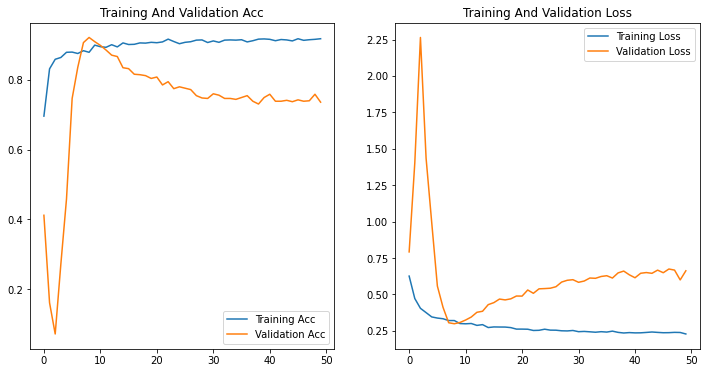

In [12]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')

plt.legend()
plt.show()